In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
results = pd.read_csv("20210219_robust_study_exp.csv")
#results_fab = pd.read_csv("20210218_robust_study_fab.csv")
#results_flow = pd.read_csv("20210218_robust_study_flow.csv")

In [3]:
results.loc[results["score"]<0, :].to_dict(orient="records")

[{'Unnamed: 0': 26.0,
  'aspect_ratio': 1.5,
  'capillary_number': 0.2,
  'expansion_ratio': 3.0,
  'flow_rate_ratio': 16.0,
  'normalized_oil_inlet': 2.5,
  'normalized_orifice_length': 1.5,
  'normalized_water_inlet': 2.5,
  'orifice_size': 75.0,
  'rate_score': -0.3638799513438808,
  'regime': 2.0,
  'score': -0.04898592062819241,
  'size_score': 0.26590811008749593},
 {'Unnamed: 0': 58.0,
  'aspect_ratio': 2.5,
  'capillary_number': 0.2,
  'expansion_ratio': 5.0,
  'flow_rate_ratio': 16.0,
  'normalized_oil_inlet': 3.5,
  'normalized_orifice_length': 2.5,
  'normalized_water_inlet': 3.5,
  'orifice_size': 75.0,
  'rate_score': -0.6960525195617691,
  'regime': 2.0,
  'score': -0.22177987856426132,
  'size_score': 0.25249276243324625}]

Text(0, 0.5, 'Robustness Score')

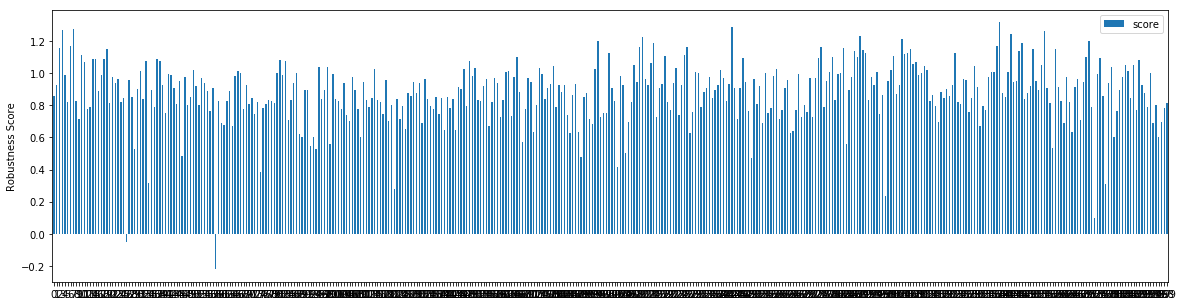

In [4]:
ax = results.plot.bar(y=["score"], rot=0, figsize=[20,5])
ax.set_ylabel("Robustness Score")

In [5]:
ax = results.plot.bar(x="Chip #", y=["score"], rot=0, figsize=[20,5])
ax.set_ylabel("Robustness Score")
ax.set_ylim([.6, 1.0])

KeyError: 'Chip #'

In [ ]:
versatility_results = pd.read_csv("20210207_versatility_scores.csv")

In [ ]:
import numpy as np
v_scores = versatility_results.loc[:,"score"]
r_scores = results.loc[:,"score"]
normed_vers = (v_scores - v_scores.min())/(v_scores.max() - v_scores.min())
normed_rob = (r_scores - r_scores.min())/(r_scores.max() - r_scores.min())

x = np.arange(25) + 1
width = 0.35
fig, ax = plt.subplots(figsize=[20,5])
rects1 = ax.bar(x - width/2, normed_vers, width, label="Versatility")
rects2 = ax.bar(x + width/2, normed_rob, width, label='Robustness')
ax.legend(["Versatility", "Robustness"])
ax.set_xticks(x)
ax.set_xlabel("Chip #")
ax.set_ylabel("Normalied score (b/w 0 and 1)")
plt.show()


# versatility_results.plot.bar(x="Chip #", y=["score"], rot=0, figsize=[20,5])
# ax = results.plot.bar(x="Chip #", y=["score"], rot=0, figsize=[20,5])
# ax.set_ylabel("Robustness Score")
# ax.set_ylim([.6, 1.0])

In [6]:
robustness_total = results.loc[:,"score"]
robustness_fab = results_fab.loc[:,"score"]
robustness_flow = results_flow.loc[:,"score"]

x = np.arange(25) + 1
width = 0.23
fig, ax = plt.subplots(figsize=[20,5])
rects1 = ax.bar(x - width, robustness_total, width, label="Total Score")
rects2 = ax.bar(x, robustness_fab, width, label='Fab Score')
rects3 = ax.bar(x + width, robustness_flow, width, label='Flow Score')
ax.legend(["Total Score", "Fab Score", "Flow Score"])

ax.set_xticks(x)
ax.set_xlabel("Chip #")
ax.set_ylabel("Score")


NameError: name 'results_fab' is not defined

In [9]:
meff_cols = ['aspect_ratio', 'expansion_ratio',
       'normalized_oil_inlet', 'normalized_orifice_length',
       'normalized_water_inlet', 'orifice_size', "capillary_number", "flow_rate_ratio"]

meff_vals = {}
for col in meff_cols:
    sweep_range = results[col].unique()
    size_score_avgs = []
    rate_score_avgs = []
    score_avgs = []
    for val in sweep_range:
        #size_avgs.append(size_normalized[all_results[col] == val].mean())
        size_score_avgs.append(results.loc[results[col] == val, "size_score"].mean())
        rate_score_avgs.append(results.loc[results[col] == val, "rate_score"].mean())
        score_avgs.append(results.loc[results[col] == val, "score"].mean())
    meff_vals[col] = {"range": sweep_range, "score_avgs": score_avgs, "size_averages": size_score_avgs, "rate_averages": rate_score_avgs}
    #meff_vals[col] = {"range": sweep_range, "score_avgs": score_avgs}
        

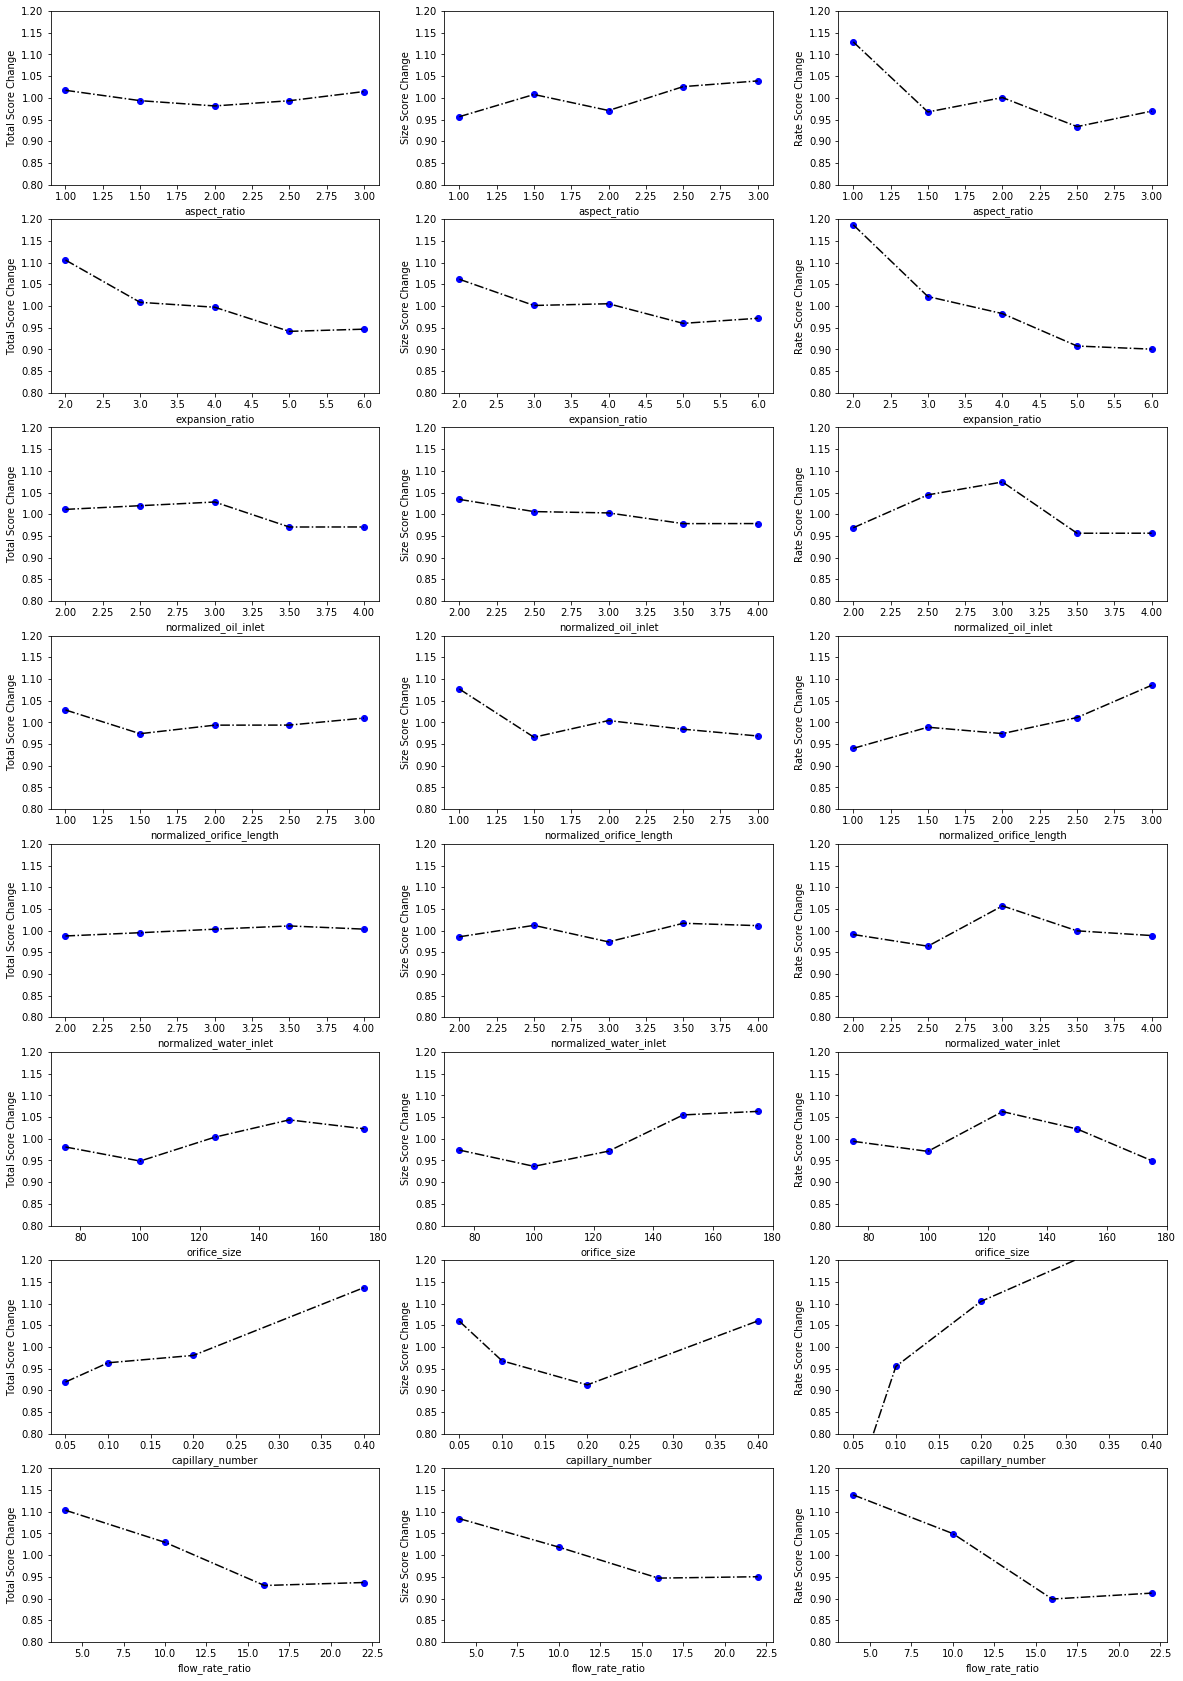

In [11]:
fig, axs = plt.subplots(8,3, figsize=[20,30])
for i, param in enumerate(meff_vals.keys()):
    param_range = meff_vals[param]["range"]
    mean_score = np.mean(meff_vals[param]["score_avgs"])
    mean_size_score = np.mean(meff_vals[param]["size_averages"])
    mean_rate_score = np.mean(meff_vals[param]["rate_averages"])
    
    score_normed =  meff_vals[param]["score_avgs"]/mean_score
    size_score_normed = meff_vals[param]["size_averages"]/mean_size_score
    rate_score_normed = meff_vals[param]["rate_averages"]/mean_rate_score
    
    axs[i][0].plot(param_range, score_normed, "bo")
    axs[i][0].plot(param_range, score_normed, "k-.")
    
    axs[i][0].set_xlabel(param)
    axs[i][0].set_ylabel("Total Score Change")
    axs[i][0].set_ylim([0.8, 1.2])
        
    axs[i][1].plot(param_range, size_score_normed, "bo")
    axs[i][1].plot(param_range, size_score_normed, "k-.")
    
    axs[i][1].set_xlabel(param)
    axs[i][1].set_ylabel("Size Score Change")
    axs[i][1].set_ylim([0.8, 1.2])
    
    axs[i][2].plot(param_range, rate_score_normed, "bo")
    axs[i][2].plot(param_range, rate_score_normed, "k-.")

    axs[i][2].set_xlabel(param)
    axs[i][2].set_ylabel("Rate Score Change")
    axs[i][2].set_ylim([0.8, 1.2])
    
plt.savefig('MainEffectAnalysis_robustness_values_exp.png')